<a href="https://colab.research.google.com/github/t-abs/Machine-Learning/blob/main/Breast_cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/archive (18).zip")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data=data.dropna(axis=1)

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
##label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1].values)

<ipython-input-16-ce96cd631e65>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1].values)


##Mapping

In [17]:
print(data.iloc[:,1])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Correlation matrix

<Axes: >

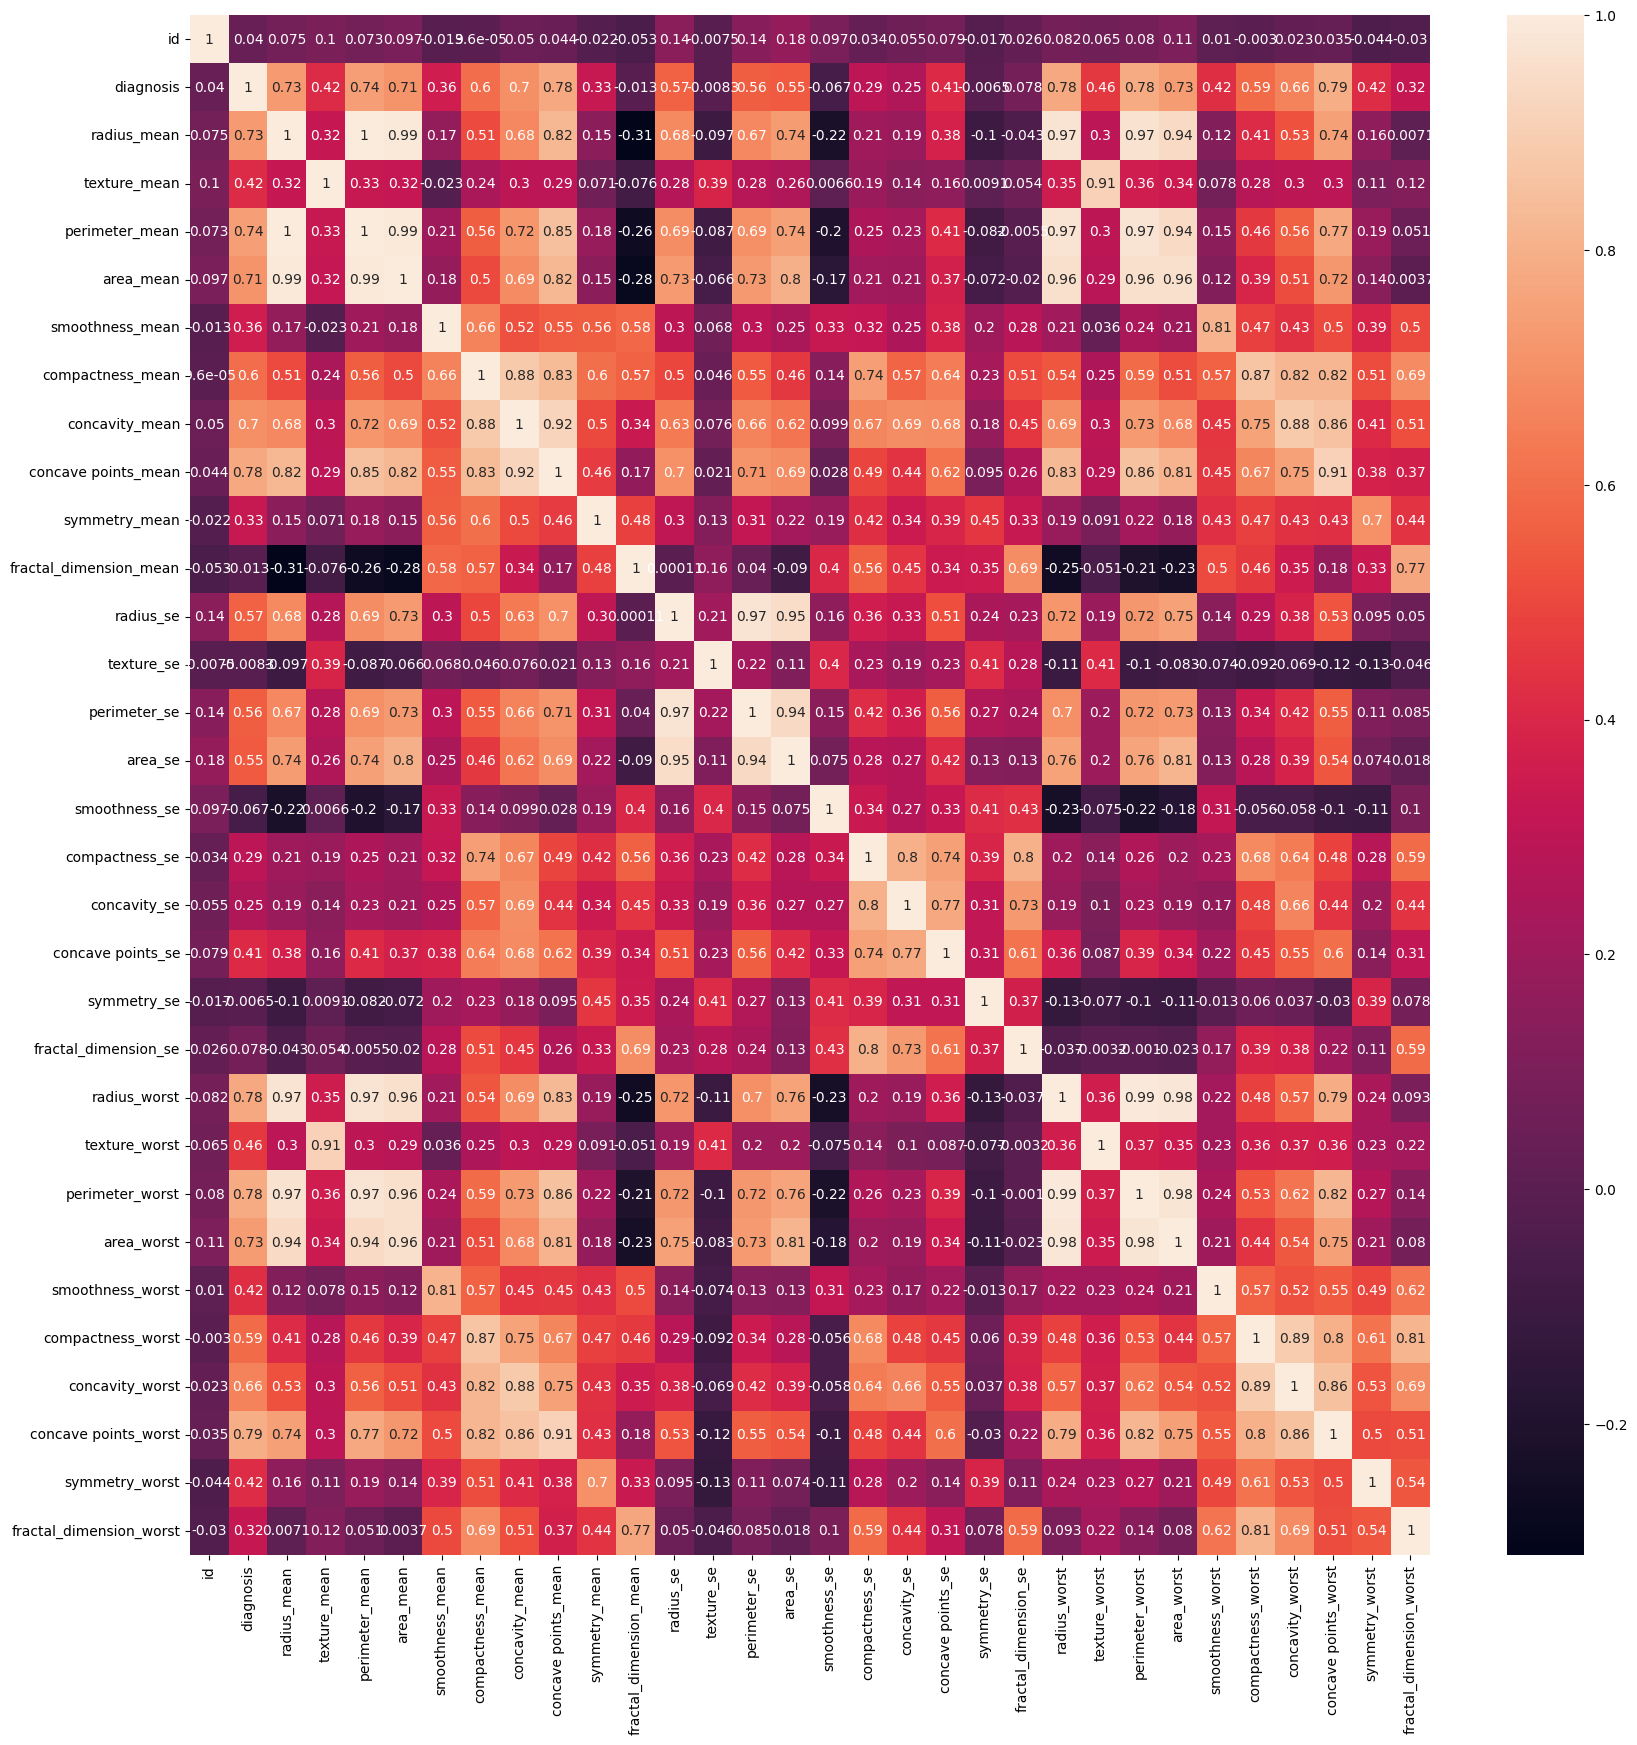

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Reduce the features of closely dimensions and make it single feature of high correlation matrix

In [19]:
x=data.iloc[:,2:31].values
y=data.iloc[:,1].values

Scaling the data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

In [23]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

### ##Multiple Algo for ML

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [27]:
y_pred_probability=lr.predict_proba(x_test)
y_pred_probability


array([[3.20881744e-02, 9.67911826e-01],
       [8.53342280e-07, 9.99999147e-01],
       [9.89846061e-01, 1.01539386e-02],
       [2.26876071e-07, 9.99999773e-01],
       [5.69154895e-01, 4.30845105e-01],
       [9.85557028e-01, 1.44429715e-02],
       [9.99851599e-01, 1.48400738e-04],
       [8.58061969e-01, 1.41938031e-01],
       [8.28332760e-05, 9.99917167e-01],
       [9.99783041e-01, 2.16958977e-04],
       [4.48460809e-01, 5.51539191e-01],
       [9.89694260e-01, 1.03057405e-02],
       [1.85967181e-05, 9.99981403e-01],
       [2.40520003e-02, 9.75948000e-01],
       [9.99961605e-01, 3.83950006e-05],
       [9.73968401e-01, 2.60315990e-02],
       [9.99928614e-01, 7.13857886e-05],
       [3.75815790e-05, 9.99962418e-01],
       [3.55710376e-03, 9.96442896e-01],
       [9.99154099e-01, 8.45900574e-04],
       [9.99988361e-01, 1.16387965e-05],
       [9.18607763e-01, 8.13922372e-02],
       [9.99998901e-01, 1.09901461e-06],
       [9.89465041e-01, 1.05349585e-02],
       [9.807095

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
from sklearn import model_selection
model_selection

<module 'sklearn.model_selection' from '/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/__init__.py'>

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_regressor = LinearRegression()

In [38]:
linear_regressor.fit(x_train,y_train)


LinearRegression()

In [39]:
linear_regressor.coef_

array([-0.9318136 ,  0.01100564,  0.35149685,  0.39655024, -0.02782084,
       -0.15387314,  0.09150636,  0.07145694,  0.03356657, -0.01406088,
       -0.00342225, -0.00289001, -0.05625595,  0.07687717,  0.01241905,
       -0.03778112, -0.14364806,  0.04193435,  0.06234152,  0.06729217,
        1.31760583,  0.0596616 , -0.04508523, -0.92698289,  0.04555087,
        0.01983807,  0.11859478,  0.06969308, -0.00970908])

In [40]:
linear_regressor.coef_

array([-0.9318136 ,  0.01100564,  0.35149685,  0.39655024, -0.02782084,
       -0.15387314,  0.09150636,  0.07145694,  0.03356657, -0.01406088,
       -0.00342225, -0.00289001, -0.05625595,  0.07687717,  0.01241905,
       -0.03778112, -0.14364806,  0.04193435,  0.06234152,  0.06729217,
        1.31760583,  0.0596616 , -0.04508523, -0.92698289,  0.04555087,
        0.01983807,  0.11859478,  0.06969308, -0.00970908])

In [45]:
predicted_value=linear_regressor.predict(x_test)


In [46]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test,predicted_value)

In [47]:
cost

0.06548936667333914

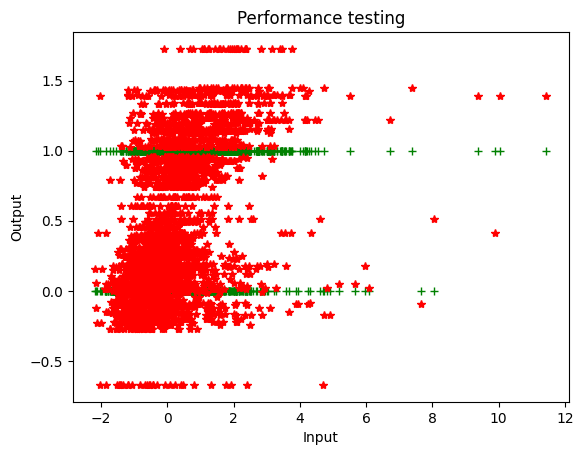

In [49]:
plt.plot(x_test, y_test, '+', color = "green")
plt.plot(x_test, predicted_value, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

